In [31]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

### 讀取資料集 

In [32]:
df = pd.read_csv('customer.csv').dropna()
df

,X1,X2,X3,Y
0,-48.2,6.8,1.6,0
1,-49.2,-17.2,0.3,0
2,-19.2,-36.7,0.8,0
3,-18.1,-6.5,0.9,0
4,-98.0,-20.8,1.7,0
5,-129.0,-14.2,1.3,0
6,-4.0,-15.8,2.1,0
7,-8.7,-36.3,2.8,0
8,-59.2,-12.8,2.1,0
9,-13.1,-17.6,0.9,0


### 整理資料 
1. 整理 y, x
2. 將 20% 的資料切成訓練資料集

In [33]:
x = df.drop('Y', axis=1)
y = df['Y']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

### 將 x 標準化

In [34]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [35]:
# 使用 MLPClassifier 來學習
mlp_clf = MLPClassifier(
            activation = 'relu',              # 激勵函式
            hidden_layer_sizes=(150,100,50),  # 隱藏層的層數及每一層的感知器數量
            max_iter = 300,                   # 更新模型參數的上限次數
            solver = 'adam'                   # 權重最佳化的演算法
        )

mlp_clf.fit(trainX_scaled, trainY)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [36]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 1.00


### Confusion Matrix

C:\Users\ajen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


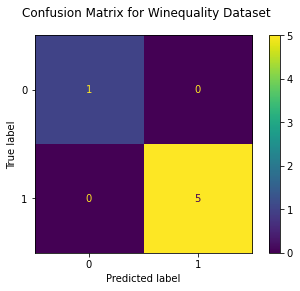

In [37]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()

In [38]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



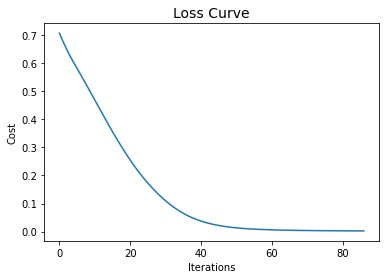

In [39]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Test credit record (X1, X2, X3) = (-25, 2.5, 0.5)

In [40]:
# To test a given customer with a credit record(X1,X2,X3)=(-25,2.5,0.5).
# Assess the accurancy of your prediction model. 
pred_data = [[-25, 2.5, 0.5]]

# Create the pandas DataFrame
pred_data_X = pd.DataFrame(pred_data, columns=['X1', 'X2', 'X3'])
pred_data_X_scaled = scaler.transform(pred_data_X)


y_pred = mlp_clf.predict(pred_data_X_scaled)

print("record(-25,2.5,0.5) 預測結果為：{}".format(y_pred[0]))

record(-25,2.5,0.5) 預測結果為：0
